# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from scipy.stats import norm
from scipy.stats import normaltest
from scipy.stats import ttest_1samp
from scipy.stats import t
from scipy.stats import ttest_ind

df = pd.read_csv('data/human_body_temperature.csv')

# 1. Is body tempearature normally distributed?

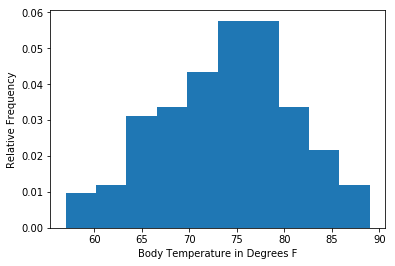

In [2]:
#Histogram suggests normality.
N=len(df)
plt.hist(df.heart_rate, bins=10, density = True)
plt.xlabel('Body Temperature in Degrees F')
plt.ylabel('Relative Frequency')
plt.show()

In [3]:
#ECDF function
def ecdf(data):
    """Computes ECDF for one-dimensional array"""
    #Sample size
    n=len(data)
    
    #Sorted data
    x=np.sort(data)
    
    #y-data
    y=np.arange(1,n+1)/n
    
    return x, y

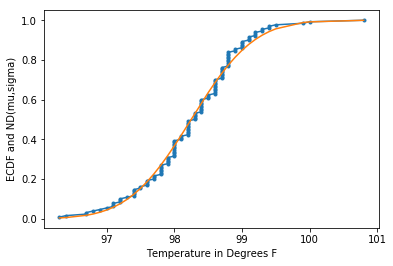

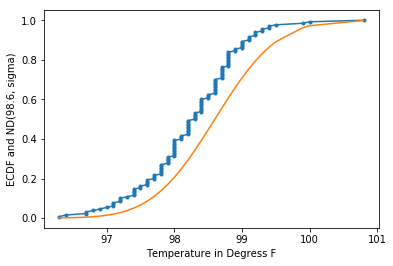

In [4]:
# ECDF compared with ND with sample statistics suggest normailty.
Data=df.temperature
mu=np.mean(Data)
sigma=np.std(Data)
x, y = ecdf(Data)
y_normal=norm.cdf(x, mu, sigma)
plt.plot(x, y, marker='.', linestyle=None)
plt.plot(x,y_normal)
plt.xlabel('Temperature in Degrees F')
plt.ylabel('ECDF and ND(mu,sigma)')
plt.show()

#ECDF compared with ND(98.6,sigma) suggests mean is not 98.6.
y_normal_old=norm.cdf(x,98.6,sigma)
plt.plot(x, y, marker='.', linestyle=None)
plt.plot(x,y_normal_old)
plt.xlabel('Temperature in Degress F')
plt.ylabel('ECDF and ND(98.6, sigma)')
plt.show()




### $H_o: \text{ Data is normally-distributed}$
### $H_a: \text{ Data is NOT normally-distributed}$
### Assuming the data was selected randomly from the entire population of humans and their temperatures and using 5% significance, the following Pearson Normality Test suggests the given data provides insufficient evidence to reject the assumption that human body temperature is normally distributed. This is due to the fact that the p-value is larger than 0.05.

In [5]:
#Pearson Normality Test with 5% significance.
print(normaltest(Data))


NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)


# 2. Is the sample size large? Are the observations Independent?

In [6]:
N

130

### The fact that much historical data has confirmed the normality of human body temperature, the sample size of 130 is sufficiently large for the tests which will be completed in this project.

In [7]:
df.gender.value_counts()

F    65
M    65
Name: gender, dtype: int64

### Without any information about the collection of the data it can only be assumed that the sample was collected radomly from the entire population and thus it will be assumed that the observations are independent. However, the fact that EXACTLY half of the data comes from females and half from males makes me a little suspicious.

# 3. Is the true population mean body temperature 98.6 degrees F?

### $\bullet$ Bootstrap Hypothesis Test of mean body temperature.
### $H_o: \mu=98.6$
### $H_a: \mu\neq 98.6$
### Below is generated a p-value for the above Hypothesis test. The extremely small p-value suggests, that under any standard level of significance, the population mean is not 98.6 degrees F.

In [8]:
def bootstrap_replicate_1d(data, func):
    """Returns one bootstrap sample from data"""
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

def diff_from_old(data):
    return np.mean(data)-98.6

#Shift data
Data_shift=Data-mu+98.6

#Draw 10,000 bootstrap samples from Shifted Temperature Data
n=10000
bs_replicate_diffs = draw_bs_reps(Data_shift,diff_from_old,n)

#p-value
observed_diff=np.abs(np.mean(Data)-98.6)
p_value=np.sum(np.abs(bs_replicate_diffs)>=np.abs(observed_diff))/10000
p_value

0.0

### $\bullet$ A one sample frequentist test of the mean is appropriate since we only have a comparison mean value of 98.6 which does not come from a second independent sample.

### $\bullet$ In this case, it is most appropriate to use a t-test since the population standard deviation is not knonw. However, due to the strong normality of the data and sample size which is NOT small, the t and z distrubutions are hardly distinguishable. Thus, a 1-sample t-test and 1-sample z-test will give essentially the same results.

### $H_o:\mu=98.6$
### $H_a:\mu\neq 98.6$

### The extremely small p-value given below suggests that this data is sufficient evidence to conclude that the mean body temperatue is not 98.6. Moreover, the negative test statistic tells us that this sample provides evidence that the mean temperature is smaller than 98.6. This is consistent with zero p-value for the above bootstrap test. 

In [9]:
true_mu = 98.6

print(ttest_1samp(Data, true_mu))


Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


# 4. Comparing t and z tests on small samples.
### $\bullet$ A t-test is most appropriate for small samples where the corresponding t-distriubtion is has a much larger variance than the standard normal distribution. 
### $\bullet$ The example below illustrates the typical reason why a t-test is appropriate for small samples. The larger variance typically means a larger p-value and thus the t-test t-test decreases the chance of making a Type I error, i.e. rejecting a true null hypothesis.

In [30]:
#Get small sample with sample mean and sample stdev
sample=np.random.choice(Data,10)
x_bar=np.mean(sample)
s=np.std(sample,ddof=1)

#t-test
t_stat=(x_bar-98.6)/(s/np.sqrt(10))

#z-statistic assuming Data stdev as population mean.
z_stat=(x_bar-98.6)/(sigma/np.sqrt(10))

#p-values
t_p=t.cdf(t_stat,9)
z_p=norm.cdf(z_stat)
print('p-values: t->'+str(t_p)+' and '+'z->'+str(z_p))

p-values: t->0.07743647215490825 and z->0.03131571265555371


# 5. At what temperature should we consider someones temperature to be "abnormal"?
### $\bullet$ Based on the apparent normality of our data and the numerous tests suggesting the regjection of 98.6 degrees F as the true mean body temperature, the data will be accepted as representative of the population in order to answer the above question. 
### $\bullet$ A 90% confidence will be used to construct confidence intervals for both the bootstrap and frequentist methods as high-confidence in health is important. 
### If I had to choose, I'd go with the frequentist method because the above analysis provides reasonable evidence that the data is fairly representative and normally distributed. In other words, based on evidence assuming the data comes from a specific normal distribution is reasonable. Also, the maximum temperature is about 100 and that is generally when I start taking action if I am not feeling well. So, this is in line with my life experience.

### The bootstrap confidence interval does not fit such a question as it is giving the confidence interval for the sample means of a large number of large samples of a population that is assumed to be EXACTLY described by our datas distribution. So, of course it will have a small margin of error which is not very useful unless someone is a hypochondriac. 

In [113]:
#Margin of Error for sample of 1 using Data as population
z_a=norm.ppf(0.95)
z_error=z_a*sigma
print('95% Confidence Interval for Z: '+str((round(mu-z_error,1),round(mu+z_error,1))))

bs_means=draw_bs_reps(Data,np.mean,10000)
low=np.percentile(bs_means,5)
high=np.percentile(bs_means,95)
print('95% Confidence Interval for BS: '+str((round(low,1),round(high,1))))


95% Confidence Interval for Z: (97.0, 99.5)
95% Confidence Interval for BS: (98.1, 98.4)


# Is there a significant difference between males and females in normal body temperature?
### Since the data had a p-value of about 0.25 for its normality test and the male and female data have similar looking histograms to that of the entire sample, I ran normality tests on each set and got fairly large p-values. Thus, there is insufficient evidence to regect the normality of the male and female data sets. Of course the mean and standard deviations of the two samples are different so it is appropriate to use a two sample t-test for independent samples(under the assumption that all the data was collected randomly). However, to be more conservative, it is not assumed that the male and female variances are equal. 

### $H_o:\mu_M=\mu_F$
### $H_a:\mu_M\neq \mu_F$

### Using 5% significance, a p-value of 0.02 states that this data provides evidence supporting a difference between the male and female mean normal temperatures.



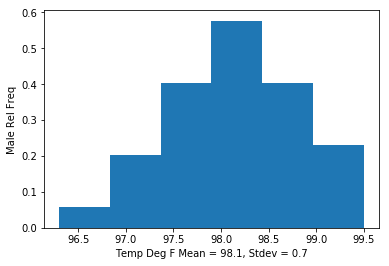

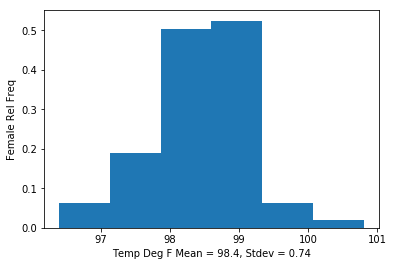

In [132]:
#Split data and get stats for visualiztion.
Mdata=df.loc[df.gender=='M'].temperature
Fdata=df.loc[df.gender=='F'].temperature
mu_M=np.mean(Mdata)
sigma_M=np.std(Mdata,ddof=1)
mu_F=np.mean(Fdata)
sigma_F=np.std(Fdata,ddof=1)

#Look at histograms
plt.hist(Mdata,bins=6,density=True)
plt.xlabel('Temp Deg F '+'Mean = '+str(round(mu_M,1))+', '+'Stdev = '+str(round(sigma_M,2)))
plt.ylabel('Male Rel Freq')
plt.show()
plt.hist(Fdata,bins=6,density=True)
plt.xlabel('Temp Deg F '+'Mean = '+str(round(mu_F,1))+', '+'Stdev = '+str(round(sigma_F,2)))
plt.ylabel('Female Rel Freq')
plt.show()

In [138]:
#normality tests assuming whole sample mean as true mean.
print('Male: '+str(normaltest(Mdata)))
print('Female: '+str(normaltest(Mdata)))

Male: NormaltestResult(statistic=0.8911999666950503, pvalue=0.6404399074569123)
Female: NormaltestResult(statistic=0.8911999666950503, pvalue=0.6404399074569123)


In [140]:
#Two sample t-test of mean for independent samples without assumption of equal variance.
ttest_ind(Mdata,Fdata,equal_var=False)

Ttest_indResult(statistic=-2.285434538165611, pvalue=0.023938264182934196)